#### Visualization: Multi-variable Relationship

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Max absolute correlation (cleaned data): 0.6866851055982736


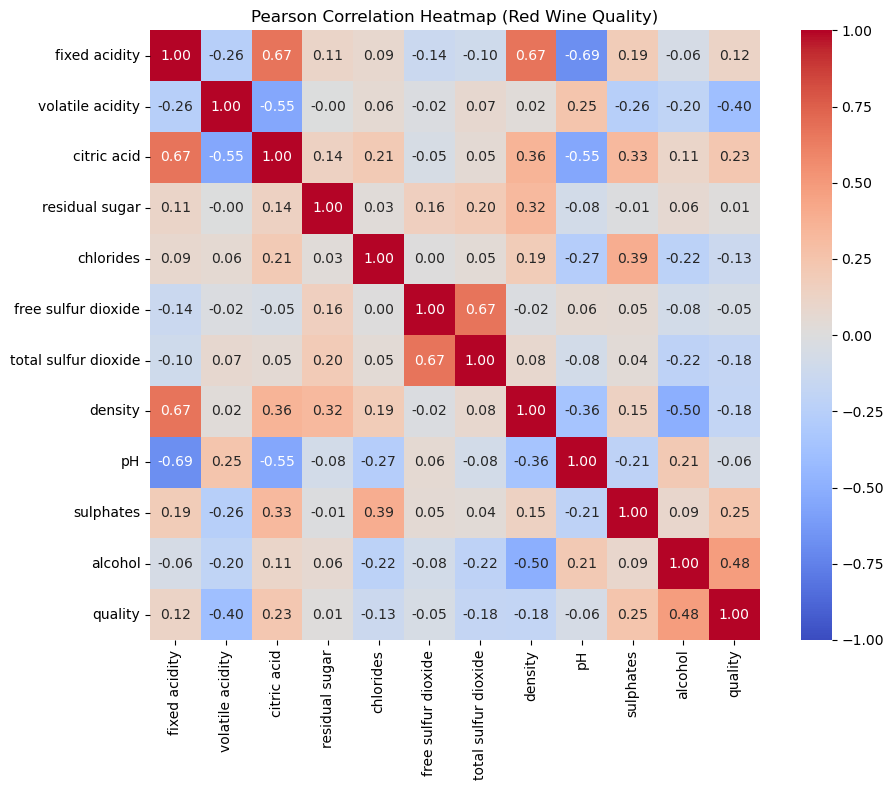

In [2]:
df = pd.read_csv("../data/winequality-red_cleaned.csv")
corr = df.corr(method="pearson")

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
max_corr = np.abs(corr.where(mask)).max().max()
print("Max absolute correlation (cleaned data):", max_corr)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Pearson Correlation Heatmap (Red Wine Quality)")
plt.tight_layout()
plt.show()

#### - 采用 |ρ| ≥ 0.8 作为“严重多重共线性”的标准，但在 cleaned 数据中没有特征对达到此阈值
#### - 最大相关系数约为 max_corr，说明不存在极端线性冗余

In [3]:
threshold = 0.6
strong_pairs = []

cols = corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)): 
        rho = corr.iloc[i, j]
        if abs(rho) >= threshold:
            strong_pairs.append((cols[i], cols[j], rho))

print("Strongly correlated feature pairs (|rho| >= {:.1f}):".format(threshold))
for a, b, r in strong_pairs:
    print(f"{a:20s} <-> {b:20s} : rho = {r:.3f}")

Strongly correlated feature pairs (|rho| >= 0.6):
fixed acidity        <-> citric acid          : rho = 0.667
fixed acidity        <-> density              : rho = 0.670
fixed acidity        <-> pH                   : rho = -0.687
free sulfur dioxide  <-> total sulfur dioxide : rho = 0.667


#### 严重共线性没有，中等相关还是有一些，对 KNN / SVM 仍然要注意维度冗余
#### 对 KNN / SVM 来说：这些“成对高度相关”的特征会让酸度方向、SO₂ 方向在特征空间被“算重了”，有效维度比名义维度少一些；不过因为相关系数 < 0.8，还不算“特别严重”的多重共线性。


Correlation with quality:
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64


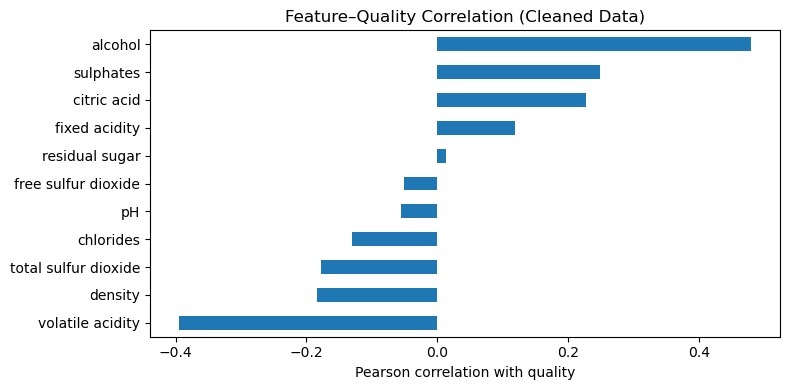

In [4]:
quality_corr = corr["quality"].drop("quality")
print("\nCorrelation with quality:")
print(quality_corr.sort_values(ascending=False))

plt.figure(figsize=(8, 4))
quality_corr.sort_values().plot(kind="barh")
plt.xlabel("Pearson correlation with quality")
plt.title("Feature–Quality Correlation (Cleaned Data)")
plt.tight_layout()
plt.show()

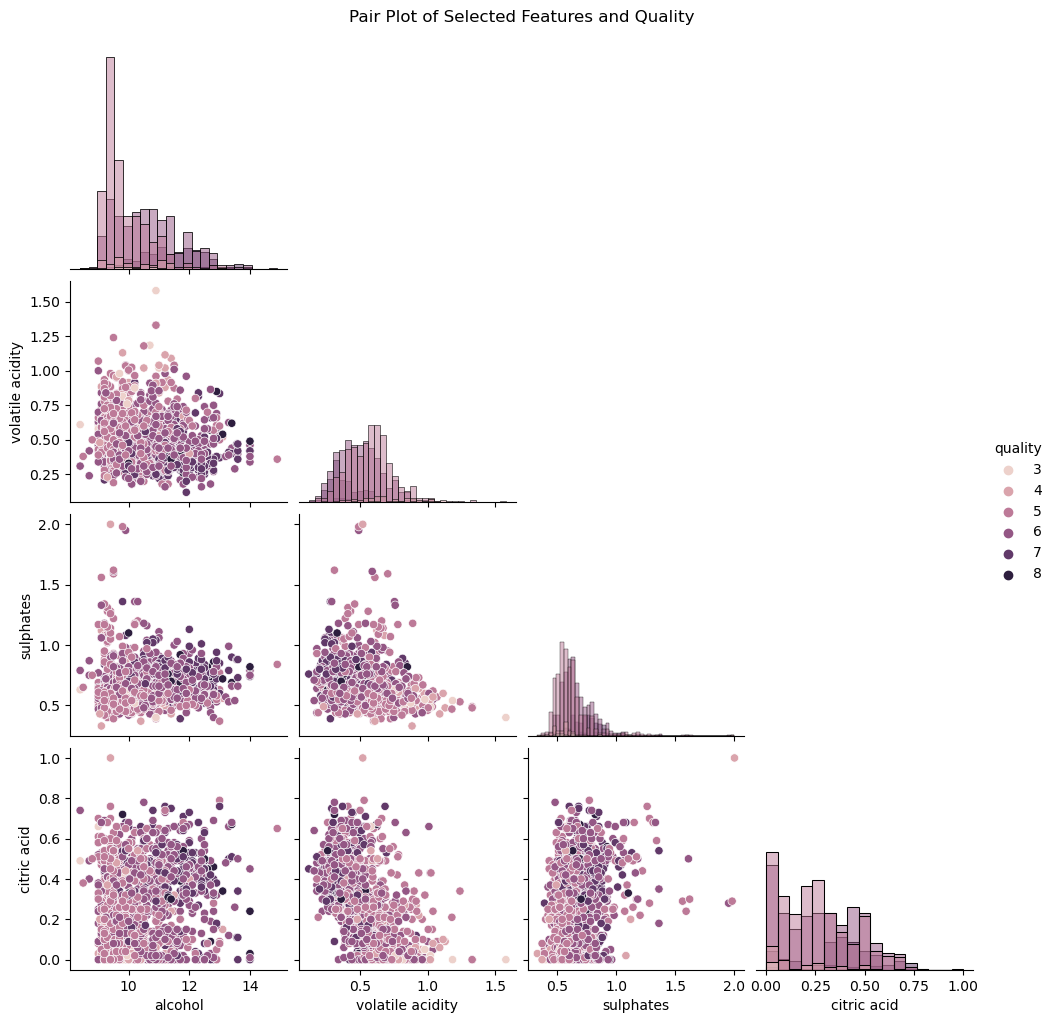

In [5]:
selected_features = ["alcohol", "volatile acidity", "sulphates", "citric acid", "quality"]
sns.pairplot(df[selected_features], hue="quality", corner=True, diag_kind="hist")
plt.suptitle("Pair Plot of Selected Features and Quality", y=1.02)
plt.show()

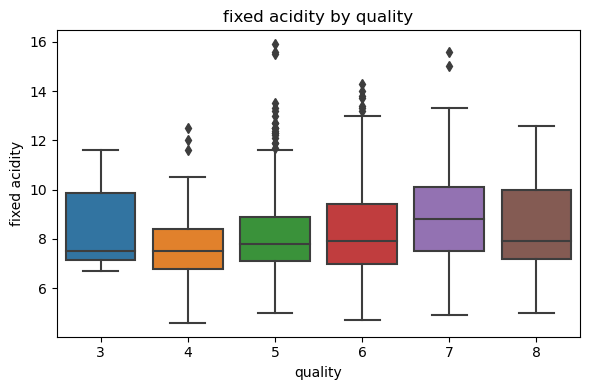

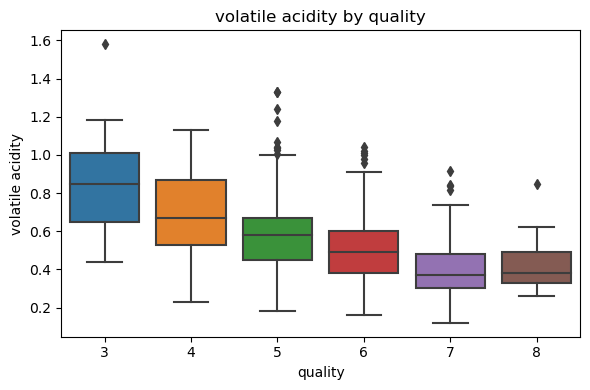

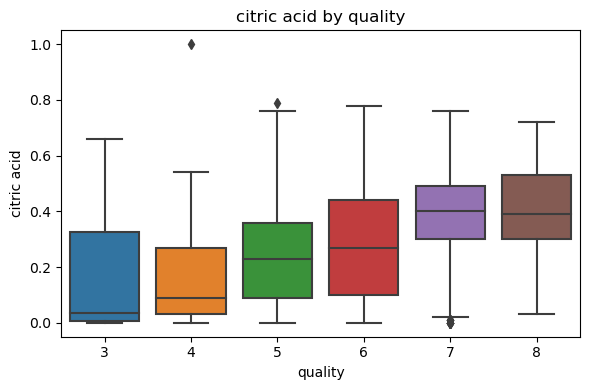

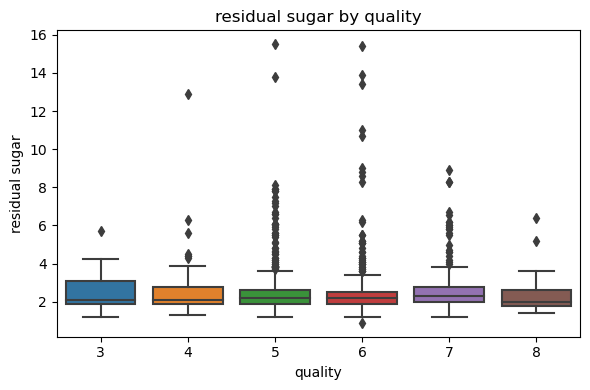

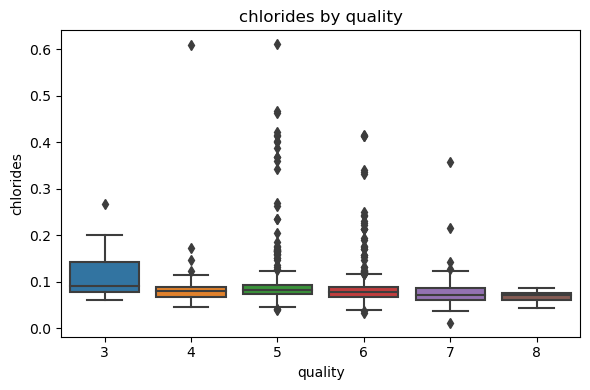

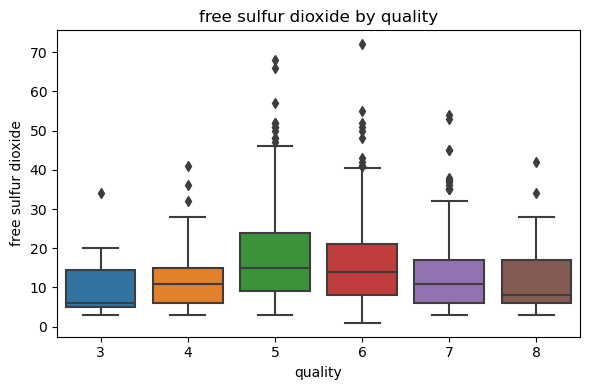

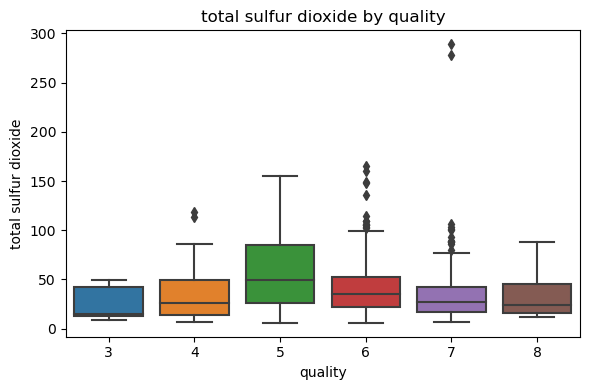

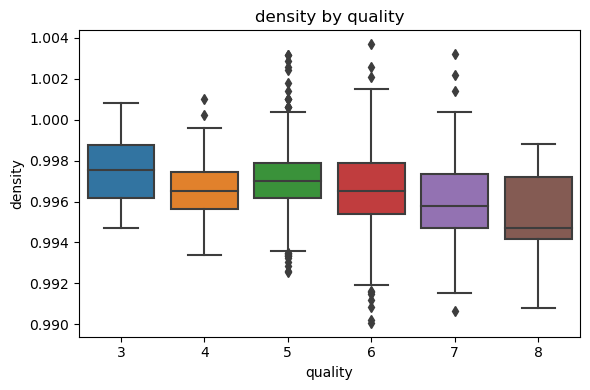

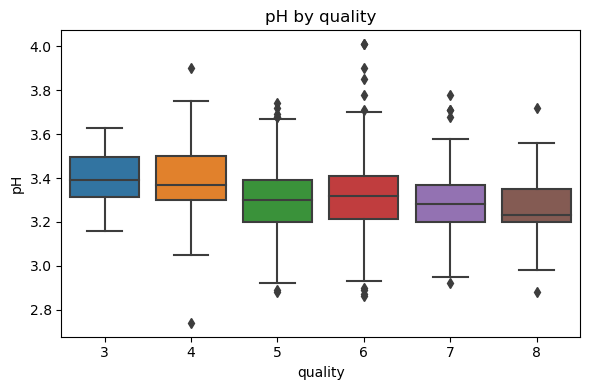

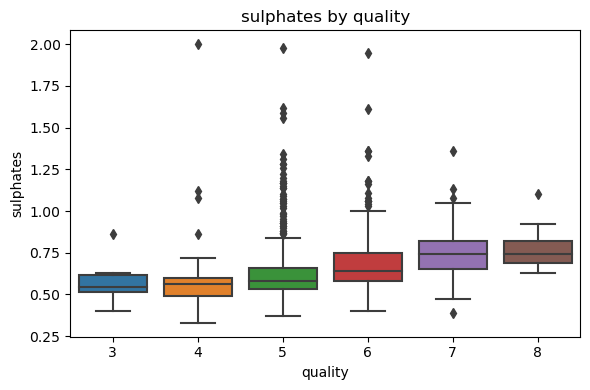

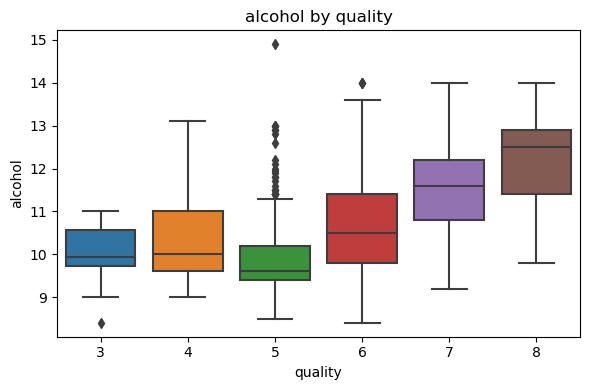

In [9]:
features_for_box = df.select_dtypes("number").columns.tolist()
features_for_box.remove("quality")

for col in features_for_box:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="quality", y=col, data=df)
    plt.title(f"{col} by quality")
    plt.tight_layout()
    plt.show()